# Data Analysis of Baterry Grid

## Problem statement
        
   To find the correlation between features provided in the dataset and analyse how they are contributing to energy management. The goal of this exercise is to find a correlation between the following pairs of features.
    
    1.Grid Status vs SOC

    2.Equivalent cycle vs SOH

    3.SOC vs Temperature
        

         

#  Importing Libraries

In [3]:
import pandas as pd
import time 
import seaborn as sns;sns.set()
import matplotlib.pyplot as plt
from sklearn import preprocessing

## Loading Data And Introduction
Using pandas we are loading CSV file into our dataframe 'df'. Data contains the following features.
#### Timestamp :
        The Unix epoch (or Unix time or POSIX time or Unix timestamp) is the number of seconds that have 
        elapsed since January 1, 1970 (midnight UTC/GMT), not counting leap seconds 
        (in ISO 8601: 1970-01-01T00:00:00Z). 
        Speaking the epoch is Unix time 0 (midnight 1/1/1970), 
        but 'epoch' is often used as a synonym for Unix time. 
#### Current :
        It's the record of current flowing through battery at that point of time. 
#### Total Voltage :
        It's the record of potential difference provided by the battery at that point of time.
#### SOC :
        State of Charge (SoC) is the level of charge of an electric battery relative to its capacity. 
        It ranges from 0 to 1 or we can say 0% to 100%. It is mainly used to represent the current state of the
        battery in use.
#### Temperature :
        The temperature of a battery now.
#### SOH :
        State of health (SoH) is a figure of merit of the condition of a battery,
        compared to its ideal conditions. Typically, a battery's SoH will be 100% at the time of manufacturing and
        will decrease over time and use. 
        However, a battery's performance at the time of manufacture may not meet its specifications, 
        in which case its initial SoH will be less than 100%.
#### Equivalent cycle :
        A charge cycle is a process of charging a rechargeable battery and discharging it as required into a load. 
        The term is typically used to specify a battery's expected life, 
        as the number of charges, cycles affects life more than the mere passage of time.

            

In [4]:
df = pd.read_csv('Assignment file for Data Analyst - assignment file.csv')
df.head()

,Timestamp,Current,Total voltage,SOC,Temperature,SOH,Equivalent cycle,Application status,Grid status,Grid power,Grid energy consumption,Grid cumulative energy consumption
0,1556701215000,0,66.72,1.0,25.229167,1.000000,0.0,1,1,0.0,0.0,0.0
1,1556702215000,0,66.72,1.0,25.528210,0.999774,0.0,1,1,0.0,0.0,0.0
2,1556703215000,0,66.72,1.0,25.859735,0.999679,0.0,1,1,0.0,0.0,0.0
3,1556704215000,0,66.72,1.0,26.204830,0.999606,0.0,1,1,0.0,0.0,0.0
4,1556705215000,0,66.72,1.0,26.553448,0.999542,0.0,1,1,0.0,0.0,0.0


## Time Indexing

  As we can see data frame contains Timestamps. From those timestamps we are extracting date and time of those instances and creating a new column "datetime". After that we will set that column as index for dataframe. 

In [5]:
df['datetime'] = df['Timestamp'].apply(lambda x: time.strftime(" %d %b %Y %H:%M:%S  ", time.localtime(int(x/1000))))

df['datetime'] = pd.to_datetime(df['datetime'] )
df = df.set_index('datetime')
df.head()


,Timestamp,Current,Total voltage,SOC,Temperature,SOH,Equivalent cycle,Application status,Grid status,Grid power,Grid energy consumption,Grid cumulative energy consumption
datetime,,,,,,,,,,,,
2019-05-01 14:30:15,1556701215000,0,66.72,1.0,25.229167,1.000000,0.0,1,1,0.0,0.0,0.0
2019-05-01 14:46:55,1556702215000,0,66.72,1.0,25.528210,0.999774,0.0,1,1,0.0,0.0,0.0
2019-05-01 15:03:35,1556703215000,0,66.72,1.0,25.859735,0.999679,0.0,1,1,0.0,0.0,0.0
2019-05-01 15:20:15,1556704215000,0,66.72,1.0,26.204830,0.999606,0.0,1,1,0.0,0.0,0.0
2019-05-01 15:36:55,1556705215000,0,66.72,1.0,26.553448,0.999542,0.0,1,1,0.0,0.0,0.0


## Normalization of Data
                
  We do data normalization when seeking for relations.The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. Min-Max normalization is a simple technique where the technique can specifically fit the data in a pre-defined boundary with a pre-defined boundary.
            
 y= (x-min)/(max-min)
 , where min and max are the minimum and maximum values in X, 
                    Hence it ranges from 0 to 1

In [6]:
min_max_scaler = preprocessing.MinMaxScaler()
x = df[['Equivalent cycle']].values.astype(float)
y = df[['Temperature']].values.astype(float)
x_scaled = min_max_scaler.fit_transform(x)
y_scaled = min_max_scaler.fit_transform(y)

df['Equivalent cycle'] = x_scaled
df['Temperature'] = y_scaled

df.head()

,Timestamp,Current,Total voltage,SOC,Temperature,SOH,Equivalent cycle,Application status,Grid status,Grid power,Grid energy consumption,Grid cumulative energy consumption
datetime,,,,,,,,,,,,
2019-05-01 14:30:15,1556701215000,0,66.72,1.0,0.042863,1.000000,0.0,1,1,0.0,0.0,0.0
2019-05-01 14:46:55,1556702215000,0,66.72,1.0,0.045444,0.999774,0.0,1,1,0.0,0.0,0.0
2019-05-01 15:03:35,1556703215000,0,66.72,1.0,0.048306,0.999679,0.0,1,1,0.0,0.0,0.0
2019-05-01 15:20:15,1556704215000,0,66.72,1.0,0.051284,0.999606,0.0,1,1,0.0,0.0,0.0
2019-05-01 15:36:55,1556705215000,0,66.72,1.0,0.054294,0.999542,0.0,1,1,0.0,0.0,0.0


In [7]:
df.index

DatetimeIndex(['2019-05-01 14:30:15', '2019-05-01 14:46:55',
               '2019-05-01 15:03:35', '2019-05-01 15:20:15',
               '2019-05-01 15:36:55', '2019-05-01 15:53:35',
               '2019-05-01 16:10:15', '2019-05-01 16:26:55',
               '2019-05-01 16:43:35', '2019-05-01 17:00:15',
               ...
               '2020-04-25 11:43:35', '2020-04-25 12:00:15',
               '2020-04-25 12:16:55', '2020-04-25 12:33:35',
               '2020-04-25 12:50:15', '2020-04-25 13:06:55',
               '2020-04-25 13:23:35', '2020-04-25 13:40:15',
               '2020-04-25 13:56:55', '2020-04-25 14:13:35'],
              dtype='datetime64[ns]', name='datetime', length=31104, freq=None)

## Correlation
To find correlation first we will go by the conventional method i.e. by plotting to scatter plot and correlation heatmap.
Analysis
If we have a data set with many columns, a good way to quickly check correlations among columns is by visualizing the correlation matrix as a heatmap. As we can observe below, first let us focus on given pairs.
    
    1.Grid Status vs SOC 
        As we see in the heatmap. It is suggesting Grid status and SOC are very less correlated to each other.
        As we can see in the Scatter plot, grid status is a binary feature and SOC ranges between -1 to 1.

    2.Equivalent cycle vs SOH
        Equivalent Cycle and SOH are in highly negative correlation with each other 
        as we can see both in heat map as well as scatter plot.
        We will see how they correspond to each other in the next session.

    3.SOC vs Temperature
        As we see in heatmap SOC and temperature are negatively correlated is some amount. 
        We get a better insight of this from scatter plot, 
        Where we can observe data is negatively correlated but in batches 
        i.e. data has a pattern but to get more clarity we need one more dimension(feature) to find its reason.

          

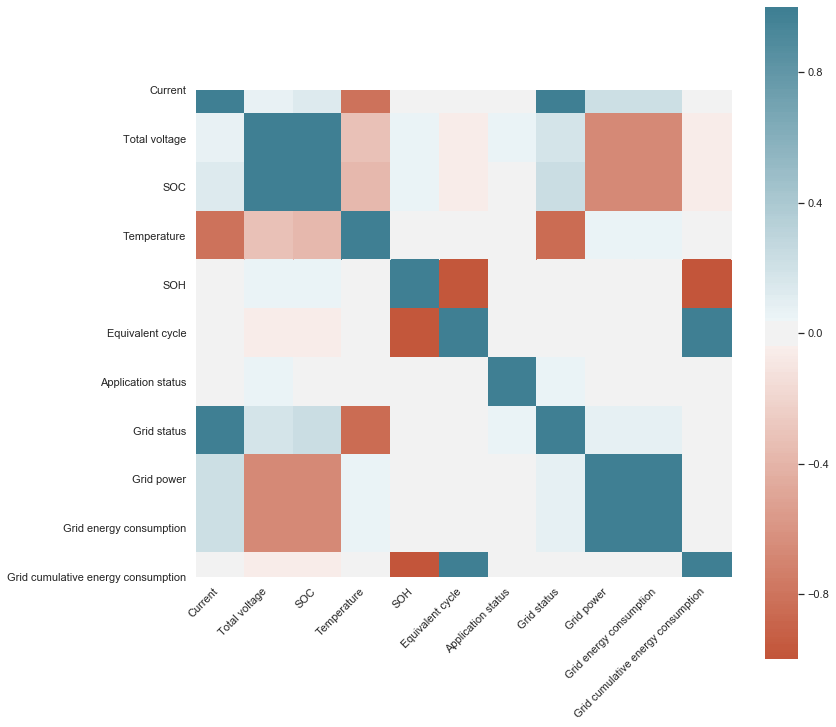

In [12]:
corr = df.drop(columns='Timestamp').corr()

plt.figure(figsize=(12,12))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

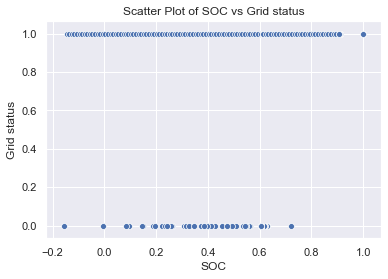

In [26]:
sns.scatterplot(x='SOC',y='Grid status',data=df);
plt.title("Scatter Plot of SOC vs Grid status");

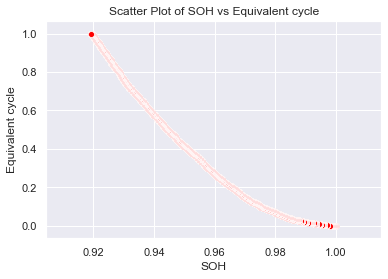

In [27]:
sns.scatterplot(x='SOH',y='Equivalent cycle',data=df,color='red');
plt.title("Scatter Plot of SOH vs Equivalent cycle");

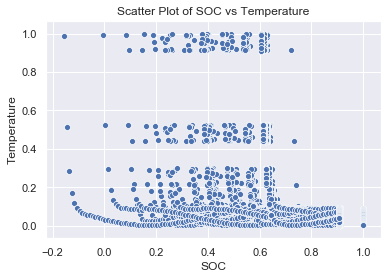

In [28]:
sns.scatterplot(x='SOC',y='Temperature',data=df);
plt.title("Scatter Plot of SOC vs Temperature");

## Time-Series Analysis
Till now we are looking at data from their perspective unaffected by there time of occurrence. But this data is measured over a specified interval of time. Because of that, we can clearly say that system change has to occur for time. There are two main goals of time series analysis: (a) identifying the nature of the phenomenon represented by the sequence of observations, and (b) forecasting (predicting future values of the time series variable). Both of these goals require that the pattern of observed time series data is identified and more or less. So to find time-series correlation in data we will simply plot line plots, Where x-axis(index) will always be DateTime and y-axis will be a feature. Then plot these features on over the other to observe how a change in one is responsible for the other, which will define their correlation.

        
            

### Now lets first try to get time series corelation from targeted pairs

   ### Gris status vs SOC
  
As we can see in the first plot we overlayed entire grid status over SOC. We can observe the pattern if we see closely, but to observe it better lets sample data from date 2019-09-09 to 2019-09-16. You can see that plot in the next graph.
From the second plot, we can observe that As Grid status go offline State of charge drops that instance at a very high rate and when Grid status again goes online state of charge starts to increase linearly at a constant rate and settles at a settling point. And again if we observe Yearly plot we can observe that settling point is decreasing by the time but at a very small rate.

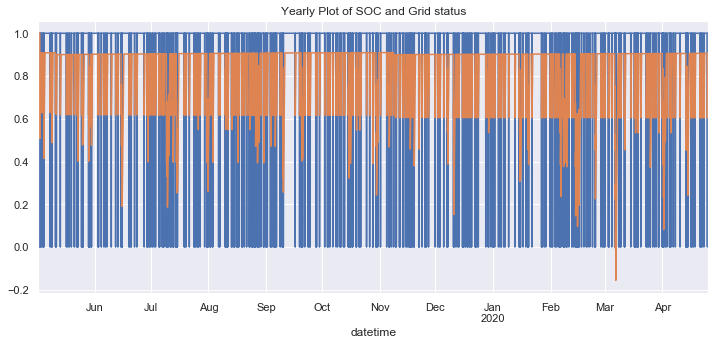

In [29]:
df['Grid status'].plot(figsize=(12,5));
df['SOC'].plot(figsize=(12,5));
plt.title("Yearly Plot of SOC and Grid status");

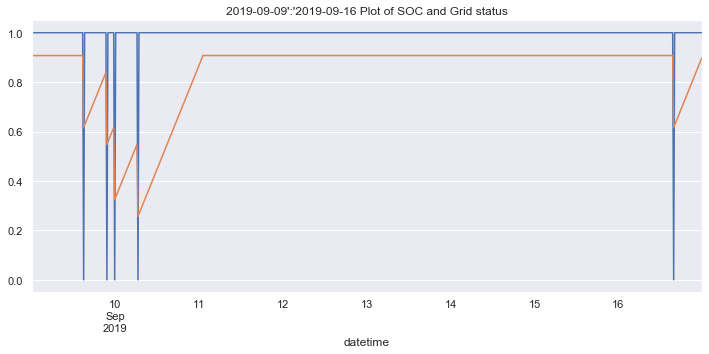

In [30]:
df['Grid status']['2019-09-09':'2019-09-16'].plot(figsize=(12,5));
df['SOC']['2019-09-09':'2019-09-16'].plot(figsize=(12,5));
plt.title("2019-09-09':'2019-09-16 Plot of SOC and Grid status");

### Temperature vs SOC
As mentioned above Temperature feature is min-max normalised. The main reason for that is to fit it in a range of 0 to 1 without losing its structural values. So that we can overlay SOC and temperature. The yearly plot is good for overall evaluation but not good enough to find a repetitive pattern. So again we are plotting weekly plot in the same interval as previously mentioned. By observing the second plot we can say temperature follows sinusoidal nature in its daily pattern with some irregularities. As Temperature irregularities occur SOC drops immediately But as soon as the temperature gets regulated SOC starts to increase linearly at a constant rate and settles at a settling point.
            

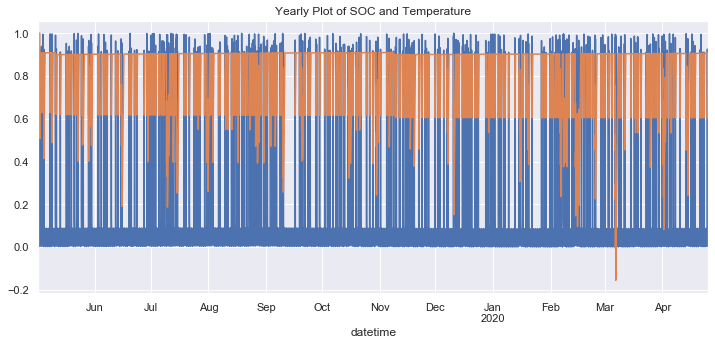

In [31]:
df['Temperature'].plot(figsize=(12,5));
df['SOC'].plot(figsize=(12,5));
plt.title("Yearly Plot of SOC and Temperature");

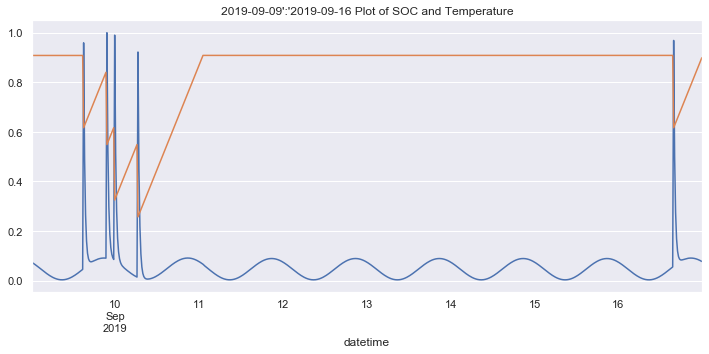

In [32]:
df['Temperature']['2019-09-09':'2019-09-16'].plot(figsize=(12,5));
df['SOC']['2019-09-09':'2019-09-16'].plot(figsize=(12,5));
plt.title("2019-09-09':'2019-09-16 Plot of SOC and Temperature");

### SOH vs Equivalent cycle
Here we normalized Equivalent cycle or the same reason as temperature. Regardless change in them concerning time is very small Because of that even if we overlay them we will not be able to find a correlation between them. So for that, we plot them separately using subplot. As we see in here change in SOH only occurs when Equivalent cycle changes As SOH decreases Equivalent cycle increases.SOH is an acronym for the State Of Battery. As mentioned in the introduction SOH is 100% at the time of manufacturing and decreases over time. From this plot, we can evaluate that as several battery cycles cumulatively increase over time life of battery decreases.

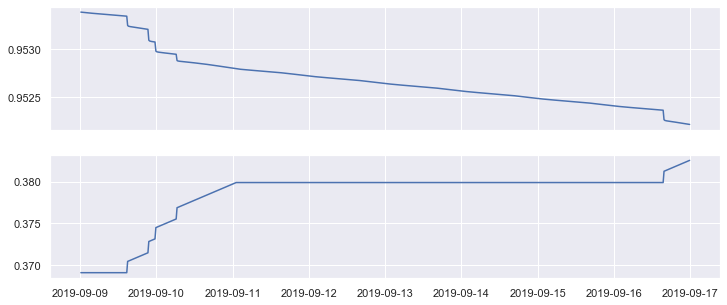

In [33]:
fig,ax = plt.subplots(2,1,sharex=True,figsize=(12,5));

sns.lineplot(data=df['SOH']['2019-09-09':'2019-09-16'],ax=ax[0],hue="event", style="event");
sns.lineplot( data=df['Equivalent cycle']['2019-09-09':'2019-09-16'],ax=ax[1],hue="event", style="event");


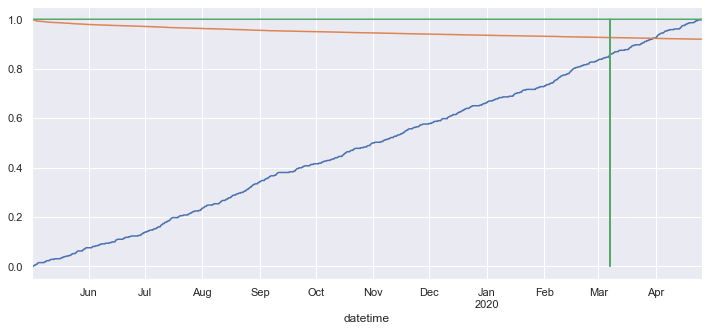

In [16]:
df['Equivalent cycle'].plot(figsize=(12,5));
df['SOH'].plot(figsize=(12,5));
df['Application status'].plot(figsize=(12,5));